(a)

Cost - When model is build with maximum margin hyperplane that separates classes, there is a chance of overfitting and becomes sensitive to noise. This ideal classification method leads to non- generalization. To overcome this, we introduce a parameter called cost which allows certain degree of misclassification in model. The cost parameter is found by cross-validation for generalized fitting. 


Gamma - It defines the amount of curve and spread of kernel function. When gamma is high, the classifying kernel creates various region around data points which is extreme case of overfitting.

In [260]:
#Import Libraries
import numpy as np
import pandas as pd
from astropy.io import ascii
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

Reading ASC table into Pandas Dataframe

In [261]:
read_table = ascii.read("SouthGermanCredit.asc")
df = read_table.to_pandas()
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


Data Preprocessing


German Kredit dataset has categorical features such as laufkont, moral, verw, famges, sparkont, buerge, weitkred and wohn are one hot encoded for SVM modelling to get kredit response.

In [262]:
#One-hot encoding 'Laufkont' feature
laufkont_encoded = pd.get_dummies(df.laufkont, prefix='laufkont')
laufkont_encoded.head()
df = pd.concat([df,laufkont_encoded],axis=1)
df.drop(['laufkont'], axis=1, inplace=True)
df.head()

,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,...,bishkred,beruf,pers,telef,gastarb,kredit,laufkont_1,laufkont_2,laufkont_3,laufkont_4
0,18,4,2,1049,1,2,4,2,1,4,...,1,3,2,1,2,1,1,0,0,0
1,9,4,0,2799,1,3,2,3,1,2,...,2,3,1,1,2,1,1,0,0,0
2,12,2,9,841,2,4,2,2,1,4,...,1,2,2,1,2,1,0,1,0,0
3,12,4,0,2122,1,3,3,3,1,2,...,2,2,1,1,1,1,1,0,0,0
4,12,4,0,2171,1,3,4,3,1,4,...,2,2,2,1,1,1,1,0,0,0


In [263]:
#One-hot encoding 'Moral' feature
moral_encoded = pd.get_dummies(df.moral, prefix='moral')
moral_encoded.head()
df = pd.concat([df,moral_encoded],axis=1)
df.drop(['moral'], axis=1, inplace=True)
df.head()

,laufzeit,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,...,kredit,laufkont_1,laufkont_2,laufkont_3,laufkont_4,moral_0,moral_1,moral_2,moral_3,moral_4
0,18,2,1049,1,2,4,2,1,4,2,...,1,1,0,0,0,0,0,0,0,1
1,9,0,2799,1,3,2,3,1,2,1,...,1,1,0,0,0,0,0,0,0,1
2,12,9,841,2,4,2,2,1,4,1,...,1,0,1,0,0,0,0,1,0,0
3,12,0,2122,1,3,3,3,1,2,1,...,1,1,0,0,0,0,0,0,0,1
4,12,0,2171,1,3,4,3,1,4,2,...,1,1,0,0,0,0,0,0,0,1


In [264]:
#One-hot encoding 'verw' feature
verw_encoded = pd.get_dummies(df.verw, prefix='verw')
verw_encoded.head()
df = pd.concat([df,verw_encoded],axis=1)
df.drop(['verw'], axis=1, inplace=True)
df.head()

,laufzeit,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,...,verw_0,verw_1,verw_2,verw_3,verw_4,verw_5,verw_6,verw_8,verw_9,verw_10
0,18,1049,1,2,4,2,1,4,2,21,...,0,0,1,0,0,0,0,0,0,0
1,9,2799,1,3,2,3,1,2,1,36,...,1,0,0,0,0,0,0,0,0,0
2,12,841,2,4,2,2,1,4,1,23,...,0,0,0,0,0,0,0,0,1,0
3,12,2122,1,3,3,3,1,2,1,39,...,1,0,0,0,0,0,0,0,0,0
4,12,2171,1,3,4,3,1,4,2,38,...,1,0,0,0,0,0,0,0,0,0


In [265]:
#One-hot encoding 'famges' feature
famges_encoded = pd.get_dummies(df.famges, prefix='famges')
famges_encoded.head()
df = pd.concat([df,famges_encoded],axis=1)
df.drop(['famges'], axis=1, inplace=True)
df.head()

,laufzeit,hoehe,sparkont,beszeit,rate,buerge,wohnzeit,verm,alter,weitkred,...,verw_4,verw_5,verw_6,verw_8,verw_9,verw_10,famges_1,famges_2,famges_3,famges_4
0,18,1049,1,2,4,1,4,2,21,3,...,0,0,0,0,0,0,0,1,0,0
1,9,2799,1,3,2,1,2,1,36,3,...,0,0,0,0,0,0,0,0,1,0
2,12,841,2,4,2,1,4,1,23,3,...,0,0,0,0,1,0,0,1,0,0
3,12,2122,1,3,3,1,2,1,39,3,...,0,0,0,0,0,0,0,0,1,0
4,12,2171,1,3,4,1,4,2,38,1,...,0,0,0,0,0,0,0,0,1,0


In [266]:
#One-hot encoding 'sparkont' feature
sparkont_encoded = pd.get_dummies(df.sparkont, prefix='sparkont')
sparkont_encoded.head()
df = pd.concat([df,sparkont_encoded],axis=1)
df.drop(['sparkont'], axis=1, inplace=True)
df.head()

,laufzeit,hoehe,beszeit,rate,buerge,wohnzeit,verm,alter,weitkred,wohn,...,verw_10,famges_1,famges_2,famges_3,famges_4,sparkont_1,sparkont_2,sparkont_3,sparkont_4,sparkont_5
0,18,1049,2,4,1,4,2,21,3,1,...,0,0,1,0,0,1,0,0,0,0
1,9,2799,3,2,1,2,1,36,3,1,...,0,0,0,1,0,1,0,0,0,0
2,12,841,4,2,1,4,1,23,3,1,...,0,0,1,0,0,0,1,0,0,0
3,12,2122,3,3,1,2,1,39,3,1,...,0,0,0,1,0,1,0,0,0,0
4,12,2171,3,4,1,4,2,38,1,2,...,0,0,0,1,0,1,0,0,0,0


In [267]:
#One-hot encoding 'buerge' feature
buerge_encoded = pd.get_dummies(df.buerge, prefix='buerge')
buerge_encoded.head()
df = pd.concat([df,buerge_encoded],axis=1)
df.drop(['buerge'], axis=1, inplace=True)
df.head()

,laufzeit,hoehe,beszeit,rate,wohnzeit,verm,alter,weitkred,wohn,bishkred,...,famges_3,famges_4,sparkont_1,sparkont_2,sparkont_3,sparkont_4,sparkont_5,buerge_1,buerge_2,buerge_3
0,18,1049,2,4,4,2,21,3,1,1,...,0,0,1,0,0,0,0,1,0,0
1,9,2799,3,2,2,1,36,3,1,2,...,1,0,1,0,0,0,0,1,0,0
2,12,841,4,2,4,1,23,3,1,1,...,0,0,0,1,0,0,0,1,0,0
3,12,2122,3,3,2,1,39,3,1,2,...,1,0,1,0,0,0,0,1,0,0
4,12,2171,3,4,4,2,38,1,2,2,...,1,0,1,0,0,0,0,1,0,0


In [268]:
#One-hot encoding 'weitkred' feature
weitkred_encoded = pd.get_dummies(df.weitkred, prefix='weitkred')
weitkred_encoded.head()
df = pd.concat([df,weitkred_encoded],axis=1)
df.drop(['weitkred'], axis=1, inplace=True)
df.head()

,laufzeit,hoehe,beszeit,rate,wohnzeit,verm,alter,wohn,bishkred,beruf,...,sparkont_2,sparkont_3,sparkont_4,sparkont_5,buerge_1,buerge_2,buerge_3,weitkred_1,weitkred_2,weitkred_3
0,18,1049,2,4,4,2,21,1,1,3,...,0,0,0,0,1,0,0,0,0,1
1,9,2799,3,2,2,1,36,1,2,3,...,0,0,0,0,1,0,0,0,0,1
2,12,841,4,2,4,1,23,1,1,2,...,1,0,0,0,1,0,0,0,0,1
3,12,2122,3,3,2,1,39,1,2,2,...,0,0,0,0,1,0,0,0,0,1
4,12,2171,3,4,4,2,38,2,2,2,...,0,0,0,0,1,0,0,1,0,0


In [269]:
#One-hot encoding 'wohn' feature
wohn_encoded = pd.get_dummies(df.wohn, prefix='wohn')
wohn_encoded.head()
df = pd.concat([df,wohn_encoded],axis=1)
df.drop(['wohn'], axis=1, inplace=True)
df.head()

,laufzeit,hoehe,beszeit,rate,wohnzeit,verm,alter,bishkred,beruf,pers,...,sparkont_5,buerge_1,buerge_2,buerge_3,weitkred_1,weitkred_2,weitkred_3,wohn_1,wohn_2,wohn_3
0,18,1049,2,4,4,2,21,1,3,2,...,0,1,0,0,0,0,1,1,0,0
1,9,2799,3,2,2,1,36,2,3,1,...,0,1,0,0,0,0,1,1,0,0
2,12,841,4,2,4,1,23,1,2,2,...,0,1,0,0,0,0,1,1,0,0
3,12,2122,3,3,2,1,39,2,2,1,...,0,1,0,0,0,0,1,1,0,0
4,12,2171,3,4,4,2,38,2,2,2,...,0,1,0,0,1,0,0,0,1,0


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   laufzeit    1000 non-null   int32
 1   hoehe       1000 non-null   int32
 2   beszeit     1000 non-null   int32
 3   rate        1000 non-null   int32
 4   wohnzeit    1000 non-null   int32
 5   verm        1000 non-null   int32
 6   alter       1000 non-null   int32
 7   bishkred    1000 non-null   int32
 8   beruf       1000 non-null   int32
 9   pers        1000 non-null   int32
 10  telef       1000 non-null   int32
 11  gastarb     1000 non-null   int32
 12  kredit      1000 non-null   int32
 13  laufkont_1  1000 non-null   uint8
 14  laufkont_2  1000 non-null   uint8
 15  laufkont_3  1000 non-null   uint8
 16  laufkont_4  1000 non-null   uint8
 17  moral_0     1000 non-null   uint8
 18  moral_1     1000 non-null   uint8
 19  moral_2     1000 non-null   uint8
 20  moral_3     1000 non-null   uin

Splitting data into train and test set

In [271]:
x, y = df.drop(['kredit'], axis=1), df['kredit']

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

Data Normalization

In [273]:
n = Normalizer()

In [274]:
#Normalize train data
x_norm = n.fit_transform(x)
x_train_norm = n.fit_transform(x_train)
x_test_norm = n.fit_transform(x_test)

Cross validating and grid searching of hyperparameter for SVM classifier

In [275]:
svm = SVC()
parameters = {'kernel':['rbf'], 'C':[0.01, 0.1, 1, 10, 100], 'gamma':[0.01, 0.1, 1, 10, 100]}

In [276]:
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [277]:
grid_search.fit(x_train_norm, y_train);

In [278]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 100, 'gamma': 100, 'kernel': 'rbf'}


In [279]:
best_result = grid_search.best_score_
print(best_result*100)

71.125


In [280]:
pd.DataFrame(grid_search.cv_results_)[['param_C','param_gamma','param_kernel','mean_test_score','rank_test_score']]

,param_C,param_gamma,param_kernel,mean_test_score,rank_test_score
0,0.01,0.01,rbf,0.70500,2
1,0.01,0.1,rbf,0.70500,2
2,0.01,1,rbf,0.70500,2
3,0.01,10,rbf,0.70500,2
4,0.01,100,rbf,0.70500,2
5,0.1,0.01,rbf,0.70500,2
6,0.1,0.1,rbf,0.70500,2
7,0.1,1,rbf,0.70500,2
8,0.1,10,rbf,0.70500,2
9,0.1,100,rbf,0.70500,2


Training full dataset with SVM


In [283]:
svm_dataset = SVC(C=100, gamma=100, kernel='rbf')
svm_dataset.fit(x_norm,y)
svm_dataset.score(x_norm,y)*100

73.2

Cross validating and grid searching of hyperparameter for logistic regression

In [284]:
log_reg = LogisticRegression()
parameters = {'C':[0.01, 0.1, 1, 10, 100]}

In [285]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train_norm, y_train);

In [286]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 0.01}


In [287]:
best_result = grid_search.best_score_
print(best_result*100)

70.5


In [289]:
pd.DataFrame(grid_search.cv_results_)[['param_C','mean_test_score','rank_test_score']]

,param_C,mean_test_score,rank_test_score
0,0.01,0.705,1
1,0.1,0.705,1
2,1,0.705,1
3,10,0.705,1
4,100,0.705,1


Building SVM model with 'Train set'   

In [290]:
svm_train = SVC(C=100, gamma=100, kernel='rbf')
svm_train.fit(x_train_norm,y_train)
svm_train.score(x_norm,y)*100

71.8

Building logistic regression model with 'Train set'   

In [257]:
log_reg_train = LogisticRegression(C=0.01)
log_reg_train.fit(x_train_norm,y_train)
log_reg_train.score(x_train_norm,y_train)*100

70.5

ROC and AUC plotting for SVM model

In [291]:
y_train_pred = svm_train.decision_function(x_train_norm)    
y_test_pred = svm_train.decision_function(x_test_norm) 

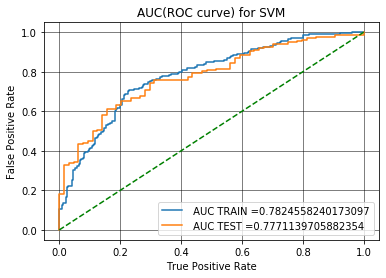

In [293]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve) for SVM")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

ROC and AUC plotting for Logistic Regression

In [258]:
y_train_pred = log_reg_train.decision_function(x_train_norm)    
y_test_pred = log_reg_train.decision_function(x_test_norm)

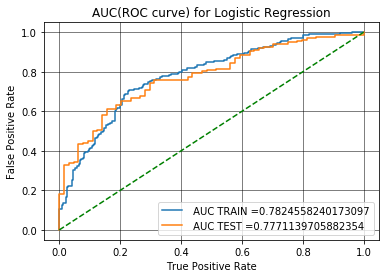

In [294]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve) for Logistic Regression")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

(d) From ROC curve of both SVM and logistic regression, it is seen that gap between train and test curve is small. Hence, the performance of model is quite underfitting.